# CHAPTER3 신경망


- 퍼셉트론에서 신경망으로
- 활성화 함수
- 다차원 배열의 계산
- 3층 신경망 구하기
- 출력층 설계하기
- 손글씨 숫자 인식
- 정리

---

### 3.1 퍼셉트론에서 신경망으로 

- 퍼셉트론은 가중치를 설정하는 작업을 여전히 사람이 수동을 해야한다.
- 신경망이 퍼셉트론의 문제를 해결해준다 (적절한 가중치를 찾을 수 있게 학습이 가능)

#### 3.1.1 신경망의 예

<img src = 'img/neural1.png' width = 300>

- 가장 왼쪽 줄을 입력층, 가운데를 은닉층, 가장 오른쪽을 출력층이라고 한다.
- 은닉충의 뉴런은 사람의 눈에 보이지 않는다.

#### 3.1.2 퍼셉트론 복습

<img src = 'img/neural2.png' width = 200>

- b(bias)를 활용한 수식

    - $b + w_1x_1 + w_2x_2 <= 0$, y = 0
    - $b + w_1x_1 + w_2x_2 > 0$, y = 1
    
    
    
- h(x)활용 : $y = h(b + w_1x_1 + w_2x_2)$

    - x <= 0 , y = 0
    - x > 0, y = 1

#### 3.1.3 활성화 함수의 등장

: 위의 h(x)처럼 입력 신호의 총합을 출력 신호로 변환하는 함수를 활성화 함수 (activation function)이라고 한다.

<img src = 'img/neural3.png' width = 200>

: 값을 더하고 그 값들을 활성화 함수에 넣어서 최종적인 y값을 도출한다.

---

### 3.2 활성화 함수

: 활성화 함수는 임계값을 경계로 출력이 바뀌는데 이런 함수를 계단 함수 (step function)이라고 한다.

#### 3.2.1 시그모이드 함수

$$h(x) = \dfrac{1}{1+exp(-x)}$$

- 신경망에서 자주 이용하는 활성화 함수다.
- S자형의 모양을 띄고 있어 이렇게 이름이 붙여졌다.

#### 3.2.2 계단 함수 구현하기

In [3]:
# make step function
import numpy as np

def step_function(x): 
    
    # y is bool
    y = x > 0 
    
    # bool to int
    return y.astype(np.int) 

#### 3.2.3 계단 함수의 그래프

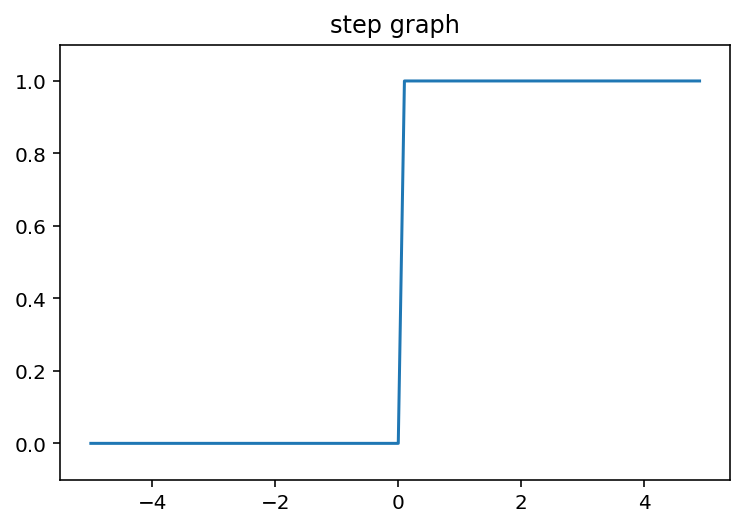

In [9]:
# make graph
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.title('step graph')
plt.ylim(-0.1, 1.1)
plt.show() 

#### 3.2.4 시그모이드 함수 구현하기

In [6]:
# make sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# test
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

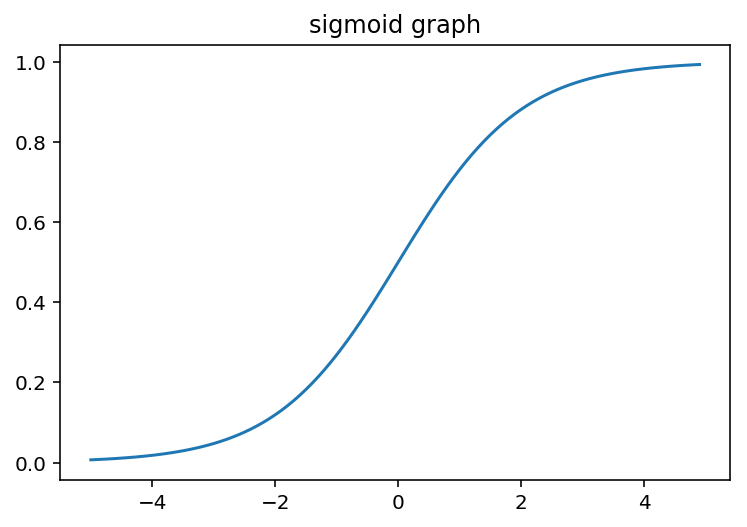

In [8]:
# make graph
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.title('sigmoid graph')
plt.show()

#### 3.2.5 시그모이드 함수와 계단 함수의 비교

- 공통점


    - 입력이 작을 때 출력은 0에 가깝고 입력이 커지면 출력이 1에 가까워진다.
    - 입력값은 0에서 1사이다.
    - 비선형 함수다.


- 차이점


    - 시그모이드가 더 매끄럽다. (신경망에서 매우 중요한 역할)
    - 시그모이드에선 연속적인 실수가 흐른다. (계단은 0, 1만)

#### 3.2.6 비선형 함수

- 비선형 함수는 말그대로 선형 함수가 아닌 함수를 말한다. (Not 직선)
- 신경망에선 활성화함수로 비선형함수를 사용해야 한다. (선형함수는 의미가 없다)
- 선형함수는 층을 깊게해도 선형에만 머물러있기 때문이다. ($h(x) = cx$, $h(h(h(x))) = c^3x$) 

#### 3.2.7 ReLU 함수

- 최근에는 시그모이드 함수보다 ReLU 함수를 신경망 분야에서 사용한다.
- 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0이하면 0을 출력한다.

In [10]:
def ReLU(x):
    return np.maximum(0, x)

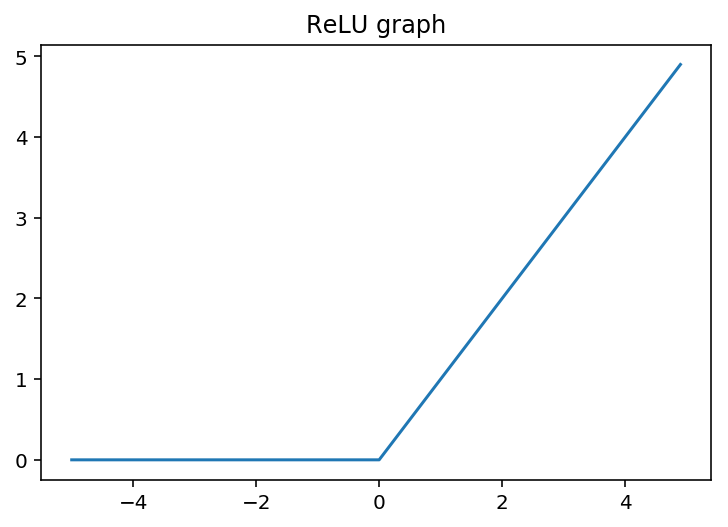

In [11]:
# make graph
x = np.arange(-5.0, 5.0, 0.1)
y = ReLU(x)

plt.plot(x, y)
plt.title('ReLU graph')
plt.show()

---

### 3.3 다차원 배열의 계산

#### 3.3.1 다차원 배열

In [14]:
# 1차원 array
A = np.array([1, 2, 3, 4])

print('A :', A)
print('Dim(차원) :', np.ndim(A))
print('Shape(모양) :', A.shape)

A : [1 2 3 4]
Dim(차원) : 1
Shape(모양) : (4,)


In [15]:
# 2차원 array(matrix) : 가로가 행, 세로가 열
B = np.array([[1, 2], [3, 4], [5, 6]])

print('B :', B)
print('Dim(차원) :', np.ndim(B))
print('Shape(모양) :', B.shape)

B : [[1 2]
 [3 4]
 [5 6]]
Dim(차원) : 2
Shape(모양) : (3, 2)


#### 3.3.2 행렬의 곱

$$ (n , m) * (m , l) = (n , l)$$

#### 3.3.3 신경망에서의 행렬 곱

In [21]:
# X, W, Y
X = np.array([[1, 2]])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W) # np.dot을 통해 계산을 한번에 할 수 있게 함

# shape
print('X :', X.shape)
print('Y :', W.shape)
print('Y :', Y.shape)

X : (1, 2)
Y : (2, 3)
Y : (1, 3)


---

### 3.4 3층 신경망 구현하기

#### 3.4.1 표기법 설명

<img src = 'img/neural4.png' width = 200>

: $W_{12}^{(1)}$ 에서 앞에 1은 다음 층의 1번째 뉴런, 2는 앞층의 2번째 뉴런, (1)은 1층의 가중치를 의미한다.

#### 3.4.2 각 층의 신호 전달 구현하기

<img src = 'img/neural5.png' width = 400>

In [25]:
# 1단계
x = np.array([1.0, 0.5]) # 1 x 2 벡터
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 2 x 3 매트릭스
B1 = np.array([0.1, 0.2, 0.3]) # 1 x 3 벡터

# a1
A1 = np.dot(x, W1) + B1
print(A1)

# z1
Z1 = sigmoid(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


<img src = 'img/neural6.png' width = 400>

In [26]:
# 2단계
W2 = np.array([ [0.1, 0.4], [0.2, 0.5], [0.3, 0.6] ])
B2 = np.array([0.1, 0.2])

# a2
A2 = np.dot(Z1, W2) + B2
print(A2)

# z2
Z2 = sigmoid(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


<img src = 'img/neural7.png' width = 400>

In [27]:
# make identity
def identity_function(x) :
    return x

# final
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

# a3
A3 = np.dot(Z2, W3) + B3
print(A3)

# Y
Y = identity_function(A3)
Y

array([0.31682708, 0.69627909])

- 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다.
- 회귀에는 항등 함수를, 2클래스 분류에는 시그모이드 함수를, 다중클래스 분류에는 소프트맥스 함수를 사용하는것이 일반적이다.

---

#### 3.4.3 구현 정리

In [29]:
# make network
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network


# make identity
def identical(x):
    return x
 
    
# make sigmoid    
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# make forward
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    y = identical(a3)
    
    return y
    

# launch
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)

print(y)

[0.31682708 0.69627909]


---

### 3.5 출력층 설계하기

: 일반적으로 회귀에는 항등 함수를, 분류에는 소프트맥스함수를 사용한다.

#### 3.5.1 항등함수와 소프트맥스 함수 구현하기

- 항등함수 : 입력 그대로 출력한다. (입력과 출력이 항상 같다)


- 소프트맥스 함수 : 

    - 분모는 모든 입력 신호의 지수함수의 합이다.
    - 분자는 입력신호 $a_k$의 지수함수를 의미한다.
    
    
$$y_k = \dfrac{exp(a_k)}{\sum exp(a_i)}$$

In [32]:
a = np.array([0.3, 2.9, 4.0])

# make exp(a)
exp_a = np.exp(a)
print('exp_a :', exp_a)

# sum exp(a)
sum_exp_a = np.sum(exp_a)
print('sum_exp_a :', sum_exp_a)

# make y
y = exp_a / sum_exp_a

print('y :', y)

exp_a : [ 1.34985881 18.17414537 54.59815003]
sum_exp_a : 74.1221542101633
y : [0.01821127 0.24519181 0.73659691]


#### 3.5.2 소프트맥스 함수 구현 시 주의점

- 소프트맥스 함수의 문제점은 오버플로 문제가 생길 수 있다는 점입니다.
- exp(100)은 0이 40개가 넘는 큰 값이 됩니다.
- 따라서 수식을 안정화시킬 필요성이 있습니다.

$$y_k = \dfrac{exp(a_k)}{\sum exp(a_i)} = \dfrac{Cexp(a_k)}{C\sum exp(a_i)} = \dfrac{exp(a_k + logC)}{\sum exp(a_i + logC)} = \dfrac{exp(a_k + C')}{\sum exp(a_i + C')}$$

- 똑같은 상수를 곱하고 exp에 넣어준다. $logC = C'$로 치환한다.
- 일반적으로 $C'$는 입력신호 중 최대값에 (-)를 붙인다.
- 이 값을 빼서 전체적으로 값을 낮추는 역할을 한다

In [33]:
# make softmax
def softmax(a):
    
    exp_a = np.exp(a - np.max(a))
    sum_exp_a = np.sum(exp_a)
    
    return exp_a / sum_exp_a

#### 3.5.3 소프트맥스 함수의 특징

In [34]:
# test softmax
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
y

array([0.01821127, 0.24519181, 0.73659691])

- 소프트맥스 함수의 출력은 0~1사이의 실수이다.
- 소프트맥스 함수 출력의 총합은 1이다. (확률로 해석 가능)

#### 3.5.4 출력층의 뉴런 수 정하기

- 출력층의 뉴런 수는 문제에 맞게 적절히 정해야 한다.
- 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다.

---

### 3.6 손글씨 숫자 인식

#### 3.6.1 MNIST 데이터 셋

In [47]:
from keras.datasets import mnist
(x_train, t_train), (x_test, t_test) = mnist.load_data()

# 각 데이터의 형상 출력
print(t_train.shape) 
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


- 인수로는 normalize, flatten, one_hot_label 세가지를 설정할 수 있다.
- normalize는 입력 이미지의 픽셀값을 0~1 사이의 값으로 정규화할지를 정한다.
- flatten은 입력 이미지를 평탄하게, 즉 1차원 배열로 만들지 정한다.
- one_hot_label은 레이블을 원-핫 인코딩 형태로 저장할지를 정한다.

#### 3.6.2 신경망의 추론 처리

In [55]:
def get_data():
    # normalize = True로 설정하여 각 픽셀의 범위를 [0, 1.0]으로 정규화 시킴
    (x_train, t_train), (x_test, t_test) = \
    mnist.load_data()
   
    return x_test, t_test
    
    
def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    
    return network
   
    
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y =  softmax(a3)
    
    return y

In [56]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) #확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print('Accuracy : ' + str(float(accuracy_cnt) / len(x)))

FileNotFoundError: [Errno 2] No such file or directory: 'sample_weight.pkl'

#### 3.6.3 배치 처리

In [ ]:
x,  _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

---

### 3.7 정리

- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다.
- Numpy 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
- Machine Learning은 크게 regression과 classification로 나눌 수 있다.
- 출력층의 활성화 함수로는 regression은 주로 항등 함수를, classification에서는 소프트맥스 함수를 이용한다.
- 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다.
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.